# COURSERA CAPSTONE PROJECTS 

### Main Objective : Finding Location and Opening Coffe Shop in Jakarta 

####  1. DATA PREPARATION 

######  This first method was done by the folowing : 
######  1. Web scrapping method to get the table in the wikipedia 
######  2. Getting the coordinate using google map API 
######  3. Checking the coordinate data using folium map 
######  4. Getting the venue data from Forsquare API 

##### Importing the necessary libraries 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import urllib.request

######  extracting table from wikipedia for borough in the City 

In [2]:
data = requests.get("https://en.wikipedia.org/wiki/List_of_Jakarta_Subdistricts").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# create a list to store neighborhood data
Borough = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-parser-output")[0].findAll("li"):
    Borough.append(row.text)

In [6]:
# create a new DataFrame from the list
df = pd.DataFrame({"Borough":Borough})

df

Borough
0             Angke
1            Cakung
2     Cempaka Putih
3        Cengkareng
4          Cilandak
..              ...
87    Tanjung Priok
88       Tegal Alur
89           Tomang
90  West Cengkareng
91    Wijaya Kusuma

[92 rows x 1 columns]

In [7]:
#save to CSV 
df.to_csv (r'C:\Users\Dell\Downloads\export_datalocation_city1.csv', index = False, header=True)

In [8]:
dataset = pd.read_csv(r'C:\Users\Dell\Downloads\export_datalocation_city1.csv',  usecols=['Borough'])

In [9]:
pd.set_option('display.max_rows', None)
print(dataset)

                     Borough
0                      Angke
1                     Cakung
2              Cempaka Putih
3                 Cengkareng
4                   Cilandak
5                   Cipayung
6                    Ciracas
7                Duren Sawit
8   Duren Sawit, Duren Sawit
9                  Duri Kepa
10           East Cengkareng
11           Gambir, Jakarta
12                    Grogol
13         Grogol Petamburan
14                  Jalembar
15             Jalembar Baru
16                Jatinegara
17                  Jatipulo
18             Jembatan Besi
19             Jembatan Lima
20                     Joglo
21                Johar Baru
22                Kali Anyar
23                 Kalideres
24      Kalideres, Kalideres
25          Kamal, Kalideres
26                     Kapuk
27                 Keagungan
28               Kebon Jeruk
29  Kebon Jeruk, Kebon Jeruk
30        Kedaung Kali Angke
31                Kelapa Dua
32             Kelapa Gading
33            

In [10]:
dataset.drop([8, 13, 24, 29, 81], inplace = True) 

In [11]:
pd.set_option('display.max_rows', None)
print(dataset)

                    Borough
0                     Angke
1                    Cakung
2             Cempaka Putih
3                Cengkareng
4                  Cilandak
5                  Cipayung
6                   Ciracas
7               Duren Sawit
9                 Duri Kepa
10          East Cengkareng
11          Gambir, Jakarta
12                   Grogol
14                 Jalembar
15            Jalembar Baru
16               Jatinegara
17                 Jatipulo
18            Jembatan Besi
19            Jembatan Lima
20                    Joglo
21               Johar Baru
22               Kali Anyar
23                Kalideres
25         Kamal, Kalideres
26                    Kapuk
27                Keagungan
28              Kebon Jeruk
30       Kedaung Kali Angke
31               Kelapa Dua
32            Kelapa Gading
33              Kemanggisan
34                Kemayoran
35       Kembangan, Jakarta
36                  Klender
37               Kota Bambu
38              Kram

###### Inputing the geospatial location 

In [12]:
replacements = {
   'Borough': {
      r'Tegal Alur' : 'Tegal Alur, Jakarta Barat',
      r'Kebon Jeruk': 'Kebon Jeruk, Jakarta Barat',
      r'Wijaya Kusuma': 'Wijaya Kusuma, Jakarta Barat',
      r'West Cengkareng': 'West Cengakareng, Jakarta Barat',
      r'Tambora': 'Tambora, Jakarta Barat',
   }
}

dataset.replace(replacements, regex=True, inplace=True)
dataset

Borough
0                                            Angke
1                                           Cakung
2                                    Cempaka Putih
3                                       Cengkareng
4                                         Cilandak
5                                         Cipayung
6                                          Ciracas
7                                      Duren Sawit
9                                        Duri Kepa
10                                 East Cengkareng
11                                 Gambir, Jakarta
12                                          Grogol
14                                        Jalembar
15                                   Jalembar Baru
16                                      Jatinegara
17                                        Jatipulo
18                                   Jembatan Besi
19                                   Jembatan Lima
20                                           Joglo
21                                      Johar Baru
22                                      Kali Anyar
23                                       Kalideres
25                                Kamal, Kalideres
26                                           Kapuk
27                                       Keagungan
28                      Kebon Jeruk, Jakarta Barat
30                              Kedaung Kali Angke
31                                      Kelapa Dua
32                                   Kelapa Gading
33                                     Kemanggisan
34                                       Kemayoran
35                              Kembangan, Jakarta
36                                         Klender
37                                      Kota Bambu
38                                     Kramat Jati
39                                        Krendang
40                                          Krukut
41                                Makasar, Jakarta
42                                     Malaka Jaya
43                                     Malaka Sari
44                                    Mangga Besar
45                                          Maphar
46                                        Matraman
47                                         Menteng
48                                      North Duri
49                                    North Kedoya
50                                 North Kembangan
51                                    North Meruya
52                                  North Sukabumi
53                             North Tanjung Duren
54                                        Palmerah
55                              Palmerah, Palmerah
56                         Pancoran, South Jakarta
57                                    Pasar Minggu
58                                      Pasar Rebo
59                                      Pegadungan
60                                         Pekojan
61                                       Pinangsia
62                                    Pondok Bambu
63                                   Pondok Kelapa
64                                     Pondok Kopi
65                                     Pulo Gadung
66                                      Rawa Buaya
67                                      Roa Malata
68                                     Sawah Besar
69                                         Semanan
70                                           Senen
71                                       Setiabudi
72                                           Slipi
73                                      South Duri
74                                    South Kedoya
75                                 South Kembangan
76                                    South Meruya
77                                  South Sukabumi
78                             South Tanjung Duren
79                                       Srengseng
80                            Taman Sari (Jakarta)
82                 Tambora, Jakarta Barat, Jakarta
83  Tambora, J

In [13]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [14]:
import googlemaps

In [15]:
gmaps_key = googlemaps.Client(key = "")

In [16]:
dataset["Latitude"] = None
dataset["Longitude"] = None
for i in range (0, len(dataset),1 ):
    geocode_result =gmaps_key.geocode(df.iat[i,0])
    try:
        lat = geocode_result[0]["geometry"]["location"]["lat"]
        long = geocode_result[0]["geometry"]["location"]["lng"]
        dataset.iat[i, dataset.columns.get_loc("Latitude")] = lat
        dataset.iat[i, dataset.columns.get_loc("Longitude")] = long
    except:
        lat = None
        long = None

In [17]:
dataset

Borough Latitude Longitude
0                                            Angke  41.4937  -81.7049
1                                           Cakung -6.18263   106.948
2                                    Cempaka Putih -6.18267   106.868
3                                       Cengkareng -6.14867   106.735
4                                         Cilandak -6.28453     106.8
5                                         Cipayung -6.32725     106.9
6                                          Ciracas -6.32312   106.871
7                                      Duren Sawit -6.23219   106.915
9                                        Duri Kepa -6.23219   106.915
10                                 East Cengkareng -6.16918   106.775
11                                 Gambir, Jakarta -6.14233   106.734
12                                          Grogol -6.17034   106.815
14                                        Jalembar -6.16086   106.793
15                                   Jalembar Baru  -6.1617   106.785
16                                      Jatinegara -6.15982   106.785
17                                        Jatipulo -6.14882   106.785
18                                   Jembatan Besi  -6.2307   106.883
19                                   Jembatan Lima -6.17834   106.805
20                                           Joglo -6.15301   106.799
21                                      Johar Baru -6.14517   106.805
22                                      Kali Anyar  48.1148  -122.756
23                                       Kalideres -6.18683   106.858
25                                Kamal, Kalideres -6.15745   106.799
26                                           Kapuk -6.13429   106.706
27                                       Keagungan -6.13429   106.706
28                      Kebon Jeruk, Jakarta Barat -7.16581   112.729
30                              Kedaung Kali Angke -6.14035   106.756
31                                      Kelapa Dua  -6.1506   106.814
32                                   Kelapa Gading -6.18346   106.765
33                                     Kemanggisan -6.18346   106.765
34                                       Kemayoran -6.15056   106.756
35                              Kembangan, Jakarta -6.23952   106.611
36                                         Klender -6.16045   106.905
37                                      Kota Bambu -6.19026   106.791
38                                     Kramat Jati -6.16037   106.847
39                                        Krendang -6.19304   106.743
40                                          Krukut -6.21726   106.903
41                                Makasar, Jakarta -6.18735   106.801
42                                     Malaka Jaya -6.28259   106.859
43                                     Malaka Sari -6.14965   106.804
44                                    Mangga Besar -6.15764   106.813
45                                          Maphar -6.27119   106.895
46                                        Matraman -6.22262   106.934
47                                         Menteng -6.22282   106.928
48                                      North Duri -6.14535   106.819
49                                    North Kedoya -6.15674   106.822
50                                 North Kembangan -6.20328   106.862
51                                    North Meruya -6.19604   106.833
52                                  North Sukabumi -6.15471   106.805
53                             North Tanjung Duren -6.17079   106.762
54                                        Palmerah -6.19304   106.743
55                              Palmerah, Palmerah -6.19709   106.738
56                         Pancoran, South Jakarta -6.20985   106.778
57                                    Pasar Minggu -6.17135   106.784
58                                      Pasar Rebo -6.19007   106.797
59                                      Pegadungan  -6.2018    106.79
60                                         Pekojan  -

In [18]:
dataset.dtypes

Borough      object
Latitude     object
Longitude    object
dtype: object

In [19]:
dataset["Latitude"] = pd.to_numeric(dataset.Latitude, errors='coerce')
dataset["Longitude"] = pd.to_numeric(dataset.Longitude, errors='coerce')
dataset.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
#save to CSV 
dataset.to_csv (r'C:\Users\Dell\Downloads\datalocation2.csv', index = False, header=True)

###### Create Map for checking the locations

In [20]:
dataloc = pd.read_csv(r'C:\Users\Dell\Downloads\datalocation2.csv',  usecols=['Borough','Latitude','Longitude'])
dataloc

Borough   Latitude   Longitude
0                                            Angke  41.493662  -81.704854
1                                           Cakung  -6.182629  106.947666
2                                    Cempaka Putih  -6.182671  106.867990
3                                       Cengkareng  -6.148665  106.735258
4                                         Cilandak  -6.284528  106.800140
5                                         Cipayung  -6.327251  106.900447
6                                          Ciracas  -6.323116  106.870940
7                                      Duren Sawit  -6.232191  106.915202
8                                        Duri Kepa  -6.232191  106.915202
9                                  East Cengkareng  -6.169185  106.774860
10                                 Gambir, Jakarta  -6.142332  106.733784
11                                          Grogol  -6.170340  106.814805
12                                        Jalembar  -6.160856  106.792766
13                                   Jalembar Baru  -6.161698  106.784641
14                                      Jatinegara  -6.159818  106.785392
15                                        Jatipulo  -6.148825  106.784739
16                                   Jembatan Besi  -6.230702  106.882743
17                                   Jembatan Lima  -6.178344  106.804564
18                                           Joglo  -6.153010  106.798665
19                                      Johar Baru  -6.145166  106.804564
20                                      Kali Anyar  48.114807 -122.756257
21                                       Kalideres  -6.186835  106.857664
22                                Kamal, Kalideres  -6.157452  106.799402
23                                           Kapuk  -6.134294  106.705773
24                                       Keagungan  -6.134294  106.705773
25                      Kebon Jeruk, Jakarta Barat  -6.188244  106.769135
26                              Kedaung Kali Angke  -6.140348  106.755900
27                                      Kelapa Dua  -6.150598  106.814150
28                                   Kelapa Gading  -6.183459  106.764748
29                                     Kemanggisan  -6.183459  106.764748
30                                       Kemayoran  -6.150556  106.755900
31                              Kembangan, Jakarta  -6.194490  106.736371
32                                         Klender  -6.160455  106.905462
33                                      Kota Bambu  -6.190262  106.791291
34                                     Kramat Jati  -6.160372  106.847338
35                                        Krendang  -6.193038  106.742589
36                                          Krukut  43.624745  -83.901901
37                                Makasar, Jakarta  -6.183640  106.798665
38                                     Malaka Jaya  -6.282586  106.859139
39                                     Malaka Sari  -6.149655  106.803827
40                                    Mangga Besar  -6.157639  106.813413
41                                          Maphar  -6.271194  106.894546
42                                        Matraman  -6.222625  106.934385
43                                         Menteng  -6.222818  106.928482
44                                      North Duri  -6.145353  106.818575
45                                    North Kedoya  -6.156740  106.821525
46                                 North Kembangan  -6.203285  106.862089
47                                    North Meruya  -6.196036  106.833080
48                                  North Sukabumi  -6.154711  106.805301
49                             North Tanjung Duren  -6.170788  106.761798
50                                        Palmerah  -6.193038  106.742589
51                              Palmerah, Palmerah  -6.197085  106.738207
52                         Pancoran, South Jakarta  -6.209847  106.778019
53                                    Pasar Min

In [21]:
dataloc.drop([77], inplace = True) 
dataloc

Borough   Latitude   Longitude
0                                            Angke  41.493662  -81.704854
1                                           Cakung  -6.182629  106.947666
2                                    Cempaka Putih  -6.182671  106.867990
3                                       Cengkareng  -6.148665  106.735258
4                                         Cilandak  -6.284528  106.800140
5                                         Cipayung  -6.327251  106.900447
6                                          Ciracas  -6.323116  106.870940
7                                      Duren Sawit  -6.232191  106.915202
8                                        Duri Kepa  -6.232191  106.915202
9                                  East Cengkareng  -6.169185  106.774860
10                                 Gambir, Jakarta  -6.142332  106.733784
11                                          Grogol  -6.170340  106.814805
12                                        Jalembar  -6.160856  106.792766
13                                   Jalembar Baru  -6.161698  106.784641
14                                      Jatinegara  -6.159818  106.785392
15                                        Jatipulo  -6.148825  106.784739
16                                   Jembatan Besi  -6.230702  106.882743
17                                   Jembatan Lima  -6.178344  106.804564
18                                           Joglo  -6.153010  106.798665
19                                      Johar Baru  -6.145166  106.804564
20                                      Kali Anyar  48.114807 -122.756257
21                                       Kalideres  -6.186835  106.857664
22                                Kamal, Kalideres  -6.157452  106.799402
23                                           Kapuk  -6.134294  106.705773
24                                       Keagungan  -6.134294  106.705773
25                      Kebon Jeruk, Jakarta Barat  -6.188244  106.769135
26                              Kedaung Kali Angke  -6.140348  106.755900
27                                      Kelapa Dua  -6.150598  106.814150
28                                   Kelapa Gading  -6.183459  106.764748
29                                     Kemanggisan  -6.183459  106.764748
30                                       Kemayoran  -6.150556  106.755900
31                              Kembangan, Jakarta  -6.194490  106.736371
32                                         Klender  -6.160455  106.905462
33                                      Kota Bambu  -6.190262  106.791291
34                                     Kramat Jati  -6.160372  106.847338
35                                        Krendang  -6.193038  106.742589
36                                          Krukut  43.624745  -83.901901
37                                Makasar, Jakarta  -6.183640  106.798665
38                                     Malaka Jaya  -6.282586  106.859139
39                                     Malaka Sari  -6.149655  106.803827
40                                    Mangga Besar  -6.157639  106.813413
41                                          Maphar  -6.271194  106.894546
42                                        Matraman  -6.222625  106.934385
43                                         Menteng  -6.222818  106.928482
44                                      North Duri  -6.145353  106.818575
45                                    North Kedoya  -6.156740  106.821525
46                                 North Kembangan  -6.203285  106.862089
47                                    North Meruya  -6.196036  106.833080
48                                  North Sukabumi  -6.154711  106.805301
49                             North Tanjung Duren  -6.170788  106.761798
50                                        Palmerah  -6.193038  106.742589
51                              Palmerah, Palmerah  -6.197085  106.738207
52                         Pancoran, South Jakarta  -6.209847  106.778019
53                                    Pasar Min

In [22]:
import numpy as np
import folium

In [43]:
#  center map on mean of Latitude/Longitude
map_world = folium.Map(location=[-6.22818 , 106.934385], zoom_start = 11)

#  add Locations to map
for lat, lng, label in zip(dataloc.Latitude, dataloc.Longitude, dataloc.Borough):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='Blue',
        fill_color='Yellow',
        fill_opacity=0.6
        ).add_to(map_world)

#  display interactive map
map_world

In [44]:
# save the map as HTML file
map_world.save('map_jakarta.html')

#####  Use the Foursquare API to explore the neighborhoods

In [25]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [26]:
# define Foursquare Credentials and Version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: JB3NHQWKPKI14RWWLY3R0GMKF3X04NTN4KNB04R3J10G2V0X
CLIENT_SECRET:W5JL4J5T0JS2WEZOMWHK1KSKUMYURD44VCCXIXAQBHOTZJEB


In [27]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(dataloc['Latitude'], dataloc['Longitude'], dataloc['Borough']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [28]:
# convert the venues list into a new DataFrame
jakarta_df = pd.DataFrame(venues)

# define the column names
jakarta_df.columns = ['Borough', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

jakarta_df.head

<bound method NDFrame.head of                                              Borough   Latitude   Longitude  \
0                                              Angke  41.493662  -81.704854   
1                                              Angke  41.493662  -81.704854   
2                                              Angke  41.493662  -81.704854   
3                                              Angke  41.493662  -81.704854   
4                                              Angke  41.493662  -81.704854   
5                                              Angke  41.493662  -81.704854   
6                                              Angke  41.493662  -81.704854   
7                                              Angke  41.493662  -81.704854   
8                                              Angke  41.493662  -81.704854   
9                                              Angke  41.493662  -81.704854   
10                                             Angke  41.493662  -81.704854   
11                    

###### Check the total venue group by borough

In [29]:
jakarta_df.groupby(["Borough"]).count()

Latitude  Longitude  \
Borough                                                               
Angke                                                100        100   
Cakung                                                45         45   
Cempaka Putih                                        100        100   
Cengkareng                                            56         56   
Cilandak                                             100        100   
Cipayung                                              40         40   
Ciracas                                               45         45   
Duren Sawit                                           84         84   
Duri Kepa                                             84         84   
East Cengkareng                                      100        100   
Gambir, Jakarta                                       70         70   
Grogol                                               100        100   
Jalembar                                             100        100   
Jalembar Baru                                        100        100   
Jatinegara                                           100        100   
Jatipulo                                             100        100   
Jembatan Besi                                         86         86   
Jembatan Lima                                        100        100   
Joglo                                                100        100   
Johar Baru                                           100        100   
Kali Anyar                                            51         51   
Kalideres                                            100        100   
Kamal, Kalideres                                      83         83   
Kapuk                                                 89         89   
Keagungan                                             89         89   
Kebon Jeruk, Jakarta Barat                           100        100   
Kedaung Kali Angke                                    22         22   
Kelapa Dua                                           100        100   
Kelapa Gading                                        100        100   
Kemanggisan                                          100        100   
Kemayoran                                             30         30   
Kembangan, Jakarta                                    84         84   
Klender                                              100        100   
Kota Bambu                                           100        100   
Kramat Jati                                          100        100   
Krendang                                             100        100   
Krukut                                                69         69   
Makasar, Jakarta                                     100        100   
Malaka Jaya                                           47         47   
Malaka Sari                                          100        100   
Mangga Besar                                         100        100   
Maphar                                                38         38   
Matraman                                              65         65   
Menteng                                               67         67   
North Duri                                           100        100   
North Kedoya                                         100        100   
North Kembangan                                      100        100   
North Meruya                                         100        100   
North Sukabumi                                       100        100   
North Tanjung Duren                                  100        100   
Palmerah                                             100        100   
Palmerah, Palmerah                                   100        100   
Pancoran, South Jakarta                              100        100   
Pasar Minggu                                         100        100   
Pasar Rebo                                           100        100   
P

In [30]:
print('There are {} uniques categories.'.format(len(jakarta_df['VenueCategory'].unique())))

There are 272 uniques categories.


In [31]:
jkt_venues = jakarta_df.groupby('VenueCategory').count()
jkt_venues

Borough  Latitude  Longitude  \
VenueCategory                                                            
Accessories Store                               7         7          7   
Acehnese Restaurant                             4         4          4   
African Restaurant                             12        12         12   
Airport                                         2         2          2   
Airport Lounge                                  1         1          1   
American Restaurant                            41        41         41   
Aquarium                                       10        10         10   
Arcade                                         40        40         40   
Art Gallery                                    10        10         10   
Art Museum                                      8         8          8   
Arts & Crafts Store                             2         2          2   
Asian Restaurant                              371       371        371   
Athletics & Sports                             14        14         14   
Australian Restaurant                           5         5          5   
Auto Dealership                                 4         4          4   
Automotive Shop                                 8         8          8   
BBQ Joint                                      50        50         50   
Badminton Court                                 3         3          3   
Bagel Shop                                      4         4          4   
Bakery                                        122       122        122   
Balinese Restaurant                             8         8          8   
Bank                                            6         6          6   
Bar                                            23        23         23   
Baseball Stadium                                3         3          3   
Basketball Court                                8         8          8   
Basketball Stadium                              1         1          1   
Beach                                           2         2          2   
Bed & Breakfast                                 7         7          7   
Beer Bar                                        2         2          2   
Beer Garden                                     1         1          1   
Betawinese Restaurant                          10        10         10   
Big Box Store                                   4         4          4   
Bistro                                          6         6          6   
Boarding House                                  5         5          5   
Bookstore                                      70        70         70   
Boutique                                        4         4          4   
Bowling Alley                                   1         1          1   
Brazilian Restaurant                            1         1          1   
Breakfast Spot                                 41        41         41   
Brewery                                        11        11         11   
Bridal Shop                                    13        13         13   
Bridge                                          1         1          1   
Bubble Tea Shop                                47        47         47   
Buffet                                          8         8          8   
Building                                        8         8          8   
Burger Joint                                   26        26         26   
Burrito Place                                   1         1          1   
Bus Line                                        1         1          1   
Cafeteria                                       1         1          1   
Café                                          185       185        185   
Camera Store                                    9         9          9   
Cantonese Restaurant                            5         5          5   
Caribbean Restaurant                          

In [32]:
jkt_venues = jkt_venues.reindex(columns=['Borough'])
jkt_venues = jkt_venues.sort_values(by=['Borough'], ascending=False).head(20)
jkt_venues

Borough
VenueCategory                     
Noodle House                   531
Coffee Shop                    527
Chinese Restaurant             518
Indonesian Restaurant          405
Asian Restaurant               371
Hotel                          197
Café                           185
Food Truck                     184
Pizza Place                    170
Restaurant                     165
Fast Food Restaurant           159
Seafood Restaurant             152
Convenience Store              129
Bakery                         122
Steakhouse                     114
Indonesian Meatball Place      113
Japanese Restaurant            110
Soup Place                      96
Dessert Shop                    89
Supermarket                     77

######  Grouping and checking the venue 

In [33]:
import matplotlib.pyplot as plt

In [34]:
# one hot encoding
jkt_onehot = pd.get_dummies(jakarta_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jkt_onehot['Borough'] = jakarta_df['Borough'] 

# move neighborhood column to the first column
fixed_columns = [jkt_onehot.columns[-1]] + list(jkt_onehot.columns[:-1])
jkt_onehot = jkt_onehot[fixed_columns]

print(jkt_onehot.shape)
jkt_onehot.head()

(7485, 273)


Borough  Accessories Store  Acehnese Restaurant  African Restaurant  \
0   Angke                  0                    0                   0   
1   Angke                  0                    0                   0   
2   Angke                  0                    0                   0   
3   Angke                  0                    0                   0   
4   Angke                  0                    0                   0   

   Airport  Airport Lounge  American Restaurant  Aquarium  Arcade  \
0        0               0                    0         0       0   
1        0               0                    0         0       0   
2        0               0                    0         0       0   
3        0               0                    0         0       0   
4        0               0                    0         0       0   

   Art Gallery  ...  Vacation Rental  Vegetarian / Vegan Restaurant  \
0            0  ...                0                              0   
1            0  ...                0                              0   
2            0  ...                0                              0   
3            0  ...                0                              0   
4            0  ...                0                              0   

   Video Game Store  Video Store  Vietnamese Restaurant  Water Park  Wine Bar  \
0                 0            0                      0           0         0   
1                 0            0                      0           0         0   
2                 0            0                      0           0         0   
3                 0            0                      0           0         0   
4                 0            0                      0           0         0   

   Winery  Wings Joint  Women's Store  
0       0            0              0  
1       0            0              0  
2       0            0              0  
3       0            0              0  
4       0            0              0  

[5 rows x 273 columns]

In [35]:
jakarta_df.VenueCategory.unique()

array(['Pub', 'Music Venue', 'Coffee Shop', 'Bar', 'Gym / Fitness Center',
       'Gastropub', 'Brewery', 'Beer Bar', 'Deli / Bodega',
       'Ice Cream Shop', 'Tea Room', 'Art Gallery', 'Seafood Restaurant',
       'Italian Restaurant', 'Market', 'Steakhouse',
       'Southern / Soul Food Restaurant', 'Café', 'Thai Restaurant',
       'Jazz Club', 'American Restaurant', 'Burrito Place', 'Hotel',
       'Burger Joint', 'Middle Eastern Restaurant',
       'Mediterranean Restaurant', 'Dive Bar', 'New American Restaurant',
       'French Restaurant', 'Bakery', 'Bagel Shop', 'Mexican Restaurant',
       'Cocktail Bar', 'Pedestrian Plaza', 'Park', 'Comedy Club',
       'Basketball Stadium', 'South American Restaurant',
       'Monument / Landmark', 'Hostel', 'Caribbean Restaurant',
       'Boutique', 'Clothing Store', 'Restaurant', 'Lebanese Restaurant',
       'Piano Bar', 'BBQ Joint', 'Grocery Store', 'Baseball Stadium',
       'Sandwich Place', 'Dessert Shop', 'Football Stadium',
       

### 2. Analyzing the Data 

######  The second phase is we need to analyze the data , this phase was done as follow :
######  1. Using one hot encoding to get the 5 most venues 
######  2. Ploting  and analyzing the data to get the cluster value 
######  3. Using the elbow methods to get the Kmean clustering value 
######  4. Grouping the cluster 
######  5. Analyzing the cluster from the 5 most venues 

###### Create one hot encoding to seek the most venues in the borough

In [45]:
jkt_onehot.rename({'Borough': 'Neighbourhood'}, axis=1, inplace=True)
jkt_onehot.head

<bound method NDFrame.head of                                        Neighbourhood  Accessories Store  \
0                                              Angke                  0   
1                                              Angke                  0   
2                                              Angke                  0   
3                                              Angke                  0   
4                                              Angke                  0   
5                                              Angke                  0   
6                                              Angke                  0   
7                                              Angke                  0   
8                                              Angke                  0   
9                                              Angke                  0   
10                                             Angke                  0   
11                                             Angke                  

In [46]:
jkt_grouped=jkt_onehot.groupby('Neighbourhood').mean().reset_index()
jkt_grouped

Neighbourhood  Accessories Store  \
0                                            Angke           0.000000   
1                                           Cakung           0.000000   
2                                    Cempaka Putih           0.000000   
3                                       Cengkareng           0.000000   
4                                         Cilandak           0.000000   
5                                         Cipayung           0.000000   
6                                          Ciracas           0.000000   
7                                      Duren Sawit           0.000000   
8                                        Duri Kepa           0.000000   
9                                  East Cengkareng           0.000000   
10                                 Gambir, Jakarta           0.000000   
11                                          Grogol           0.000000   
12                                        Jalembar           0.000000   
13                                   Jalembar Baru           0.000000   
14                                      Jatinegara           0.000000   
15                                        Jatipulo           0.000000   
16                                   Jembatan Besi           0.000000   
17                                   Jembatan Lima           0.000000   
18                                           Joglo           0.000000   
19                                      Johar Baru           0.000000   
20                                      Kali Anyar           0.000000   
21                                       Kalideres           0.000000   
22                                Kamal, Kalideres           0.000000   
23                                           Kapuk           0.000000   
24                                       Keagungan           0.000000   
25                      Kebon Jeruk, Jakarta Barat           0.000000   
26                              Kedaung Kali Angke           0.000000   
27                                      Kelapa Dua           0.000000   
28                                   Kelapa Gading           0.000000   
29                                     Kemanggisan           0.000000   
30                                       Kemayoran           0.000000   
31                              Kembangan, Jakarta           0.000000   
32                                         Klender           0.000000   
33                                      Kota Bambu           0.000000   
34                                     Kramat Jati           0.010000   
35                                        Krendang           0.000000   
36                                          Krukut           0.014493   
37                                Makasar, Jakarta           0.000000   
38                                     Malaka Jaya           0.000000   
39                                     Malaka Sari           0.000000   
40                                    Mangga Besar           0.000000   
41                                          Maphar           0.000000   
42                                        Matraman           0.000000   
43                                         Menteng           0.000000   
44                                      North Duri           0.010000   
45                                    North Kedoya           0.000000   
46                                 North Kembangan           0.000000   
47                                    North Meruya           0.000000   
48                                  North Sukabumi           0.000000   
49                             North Tanjung Duren           0.000000   
50                                        Palmerah           0.000000   
51                              Palmerah, Palmerah           0.000000   
52                         Pancoran, South Jakarta           0.000000   
53                                    Pasar Minggu           0.000000   
54                    

In [47]:
num_top_venues = 5


for hood in jkt_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = jkt_grouped[jkt_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Angke----
         venue  freq
0      Brewery  0.08
1  Coffee Shop  0.05
2          Bar  0.05
3        Hotel  0.04
4  Music Venue  0.03


----Cakung----
                  venue  freq
0  Fast Food Restaurant  0.09
1           Coffee Shop  0.07
2      Department Store  0.07
3           Pizza Place  0.04
4         Shopping Mall  0.04


----Cempaka Putih----
                   venue  freq
0  Indonesian Restaurant  0.09
1                   Café  0.07
2            Coffee Shop  0.07
3   Fast Food Restaurant  0.05
4      Convenience Store  0.05


----Cengkareng----
                   venue  freq
0       Asian Restaurant  0.11
1           Noodle House  0.07
2     Chinese Restaurant  0.05
3  Indonesian Restaurant  0.05
4            Pizza Place  0.05


----Cilandak----
                   venue  freq
0            Coffee Shop  0.16
1  Indonesian Restaurant  0.07
2                   Café  0.06
3  Padangnese Restaurant  0.04
4       Asian Restaurant  0.03


----Cipayung----
                   ven

4         Coffee Shop  0.05


----North Kembangan----
                   venue  freq
0            Coffee Shop  0.09
1  Indonesian Restaurant  0.08
2      Convenience Store  0.06
3            Pizza Place  0.06
4       Asian Restaurant  0.06


----North Meruya----
                   venue  freq
0                  Hotel  0.10
1            Coffee Shop  0.08
2  Indonesian Restaurant  0.07
3     Chinese Restaurant  0.07
4    Japanese Restaurant  0.06


----North Sukabumi----
                venue  freq
0        Noodle House  0.17
1  Chinese Restaurant  0.14
2    Asian Restaurant  0.08
3         Coffee Shop  0.05
4              Bakery  0.04


----North Tanjung Duren----
                   venue  freq
0           Noodle House  0.15
1  Indonesian Restaurant  0.09
2     Chinese Restaurant  0.08
3            Coffee Shop  0.06
4     Seafood Restaurant  0.06


----Palmerah----
                   venue  freq
0            Coffee Shop  0.09
1  Indonesian Restaurant  0.06
2     Chinese Restaurant  0.04

###### Put the data into the column 

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = jkt_grouped['Neighbourhood']

for ind in np.arange(jkt_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jkt_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

Neighbourhood  1st Most Common Venue  \
0                                            Angke                Brewery   
1                                           Cakung   Fast Food Restaurant   
2                                    Cempaka Putih  Indonesian Restaurant   
3                                       Cengkareng       Asian Restaurant   
4                                         Cilandak            Coffee Shop   
5                                         Cipayung  Indonesian Restaurant   
6                                          Ciracas      Convenience Store   
7                                      Duren Sawit   Fast Food Restaurant   
8                                        Duri Kepa   Fast Food Restaurant   
9                                  East Cengkareng           Noodle House   
10                                 Gambir, Jakarta       Asian Restaurant   
11                                          Grogol           Noodle House   
12                                        Jalembar            Coffee Shop   
13                                   Jalembar Baru     Chinese Restaurant   
14                                      Jatinegara     Chinese Restaurant   
15                                        Jatipulo     Chinese Restaurant   
16                                   Jembatan Besi       Asian Restaurant   
17                                   Jembatan Lima            Coffee Shop   
18                                           Joglo           Noodle House   
19                                      Johar Baru     Chinese Restaurant   
20                                      Kali Anyar                  Hotel   
21                                       Kalideres  Indonesian Restaurant   
22                                Kamal, Kalideres     Chinese Restaurant   
23                                           Kapuk           Noodle House   
24                                       Keagungan           Noodle House   
25                      Kebon Jeruk, Jakarta Barat           Noodle House   
26                              Kedaung Kali Angke            Coffee Shop   
27                                      Kelapa Dua     Chinese Restaurant   
28                                   Kelapa Gading           Noodle House   
29                                     Kemanggisan           Noodle House   
30                                       Kemayoran            Coffee Shop   
31                              Kembangan, Jakarta            Coffee Shop   
32                                         Klender           Noodle House   
33                                      Kota Bambu            Coffee Shop   
34                                     Kramat Jati                  Hotel   
35                                        Krendang            Coffee Shop   
36                                          Krukut   Fast Food Restaurant   
37                                Makasar, Jakarta            Coffee Shop   
38                                     Malaka Jaya             Restaurant   
39                                     Malaka Sari     Chinese Restaurant   
40                                    Mangga Besar     Chinese Restaurant   
41                                          Maphar            Coffee Shop   
42                                        Matraman  Indonesian Restaurant   
43                                         Menteng  Indonesian Restaurant   
44                                      North Duri     Chinese Restaurant   
45                                    North Kedoya     Chinese Restaurant   
46                                 North Kembangan            Coffee Shop   
47                                    North Meruya                  Hotel   
48                                  North Sukabumi           Noodle House   
49                             North Tanjung Duren           Noodle House   
50                                        Palmerah            Coffee Shop   
51                              P

###### Save to CSV file for backup and presentation

In [50]:
neighbourhoods_venues_sorted.to_csv (r'C:\Users\Dell\Downloads\top5venue.csv', index = False, header=True)

In [51]:
neighbourhoods_venues_sorted.shape

(86, 6)

In [52]:
dataloc.head

<bound method NDFrame.head of                                            Borough   Latitude   Longitude
0                                            Angke  41.493662  -81.704854
1                                           Cakung  -6.182629  106.947666
2                                    Cempaka Putih  -6.182671  106.867990
3                                       Cengkareng  -6.148665  106.735258
4                                         Cilandak  -6.284528  106.800140
5                                         Cipayung  -6.327251  106.900447
6                                          Ciracas  -6.323116  106.870940
7                                      Duren Sawit  -6.232191  106.915202
8                                        Duri Kepa  -6.232191  106.915202
9                                  East Cengkareng  -6.169185  106.774860
10                                 Gambir, Jakarta  -6.142332  106.733784
11                                          Grogol  -6.170340  106.814805
12      

###### Plotting and analyzing the data to get the cluster value  

In [53]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

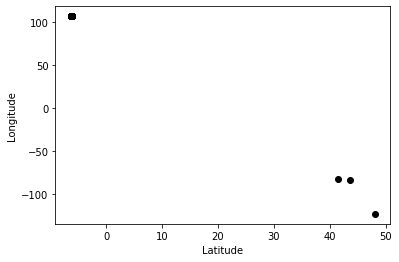

In [54]:
X = dataloc[["Latitude","Longitude"]]
#Visualise data points
plt.scatter(X["Latitude"],X["Longitude"],c='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [55]:
X = dataloc.iloc[:, [1, 2]].values
print(X)

[[  41.493662   -81.7048536]
 [  -6.1826294  106.947666 ]
 [  -6.1826708  106.8679899]
 [  -6.1486651  106.7352584]
 [  -6.2845276  106.8001396]
 [  -6.3272512  106.9004472]
 [  -6.3231156  106.8709404]
 [  -6.2321915  106.9152021]
 [  -6.2321915  106.9152021]
 [  -6.1691846  106.7748596]
 [  -6.1423316  106.7337841]
 [  -6.1703402  106.8148046]
 [  -6.1608563  106.7927658]
 [  -6.161698   106.7846412]
 [  -6.1598176  106.7853922]
 [  -6.1488247  106.7847391]
 [  -6.2307016  106.8827427]
 [  -6.1783437  106.804564 ]
 [  -6.1530103  106.7986648]
 [  -6.1451657  106.804564 ]
 [  48.1148074 -122.7562567]
 [  -6.1868347  106.8576636]
 [  -6.1574525  106.7994022]
 [  -6.1342937  106.7057733]
 [  -6.1342937  106.7057733]
 [  -6.188244   106.769135 ]
 [  -6.1403479  106.7559004]
 [  -6.1505982  106.8141505]
 [  -6.183459   106.7647475]
 [  -6.183459   106.7647475]
 [  -6.150556   106.7559004]
 [  -6.19449    106.736371 ]
 [  -6.1604549  106.9054618]
 [  -6.1902622  106.791291 ]
 [  -6.1603721

######  Using the elbow method to get the K mean clustering value 

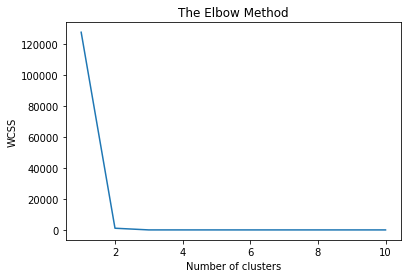

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

######  From the elbow methods it was found that the Kcluster value is - 2 

######  Using the cluster value and group based on the cluster

In [57]:
# set number of clusters
kclusters = 2

jkt_grouped_clustering = jkt_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jkt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [58]:
kmeans1 = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X)
print (y_kmeans1)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


######  Analyzing the cluster value 

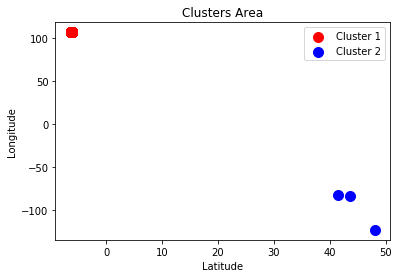

In [59]:
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters Area')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

######  Grouping the cluster value and seek the 5 most venue 

In [60]:
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
neighbourhoods_venues_sorted.head()

Cluster_Labels  Neighbourhood  1st Most Common Venue  \
0               0          Angke                Brewery   
1               0         Cakung   Fast Food Restaurant   
2               0  Cempaka Putih  Indonesian Restaurant   
3               0     Cengkareng       Asian Restaurant   
4               0       Cilandak            Coffee Shop   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0            Coffee Shop                    Bar                  Hotel   
1       Department Store            Coffee Shop             Theme Park   
2            Coffee Shop                   Café      Convenience Store   
3           Noodle House  Indonesian Restaurant     Chinese Restaurant   
4  Indonesian Restaurant                   Café  Padangnese Restaurant   

  5th Most Common Venue  
0  Gym / Fitness Center  
1      Asian Restaurant  
2            Restaurant  
3           Pizza Place  
4                   Gym

In [61]:
jkt_merged = dataloc

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jkt_merged = jkt_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Borough')

jkt_merged.head() # check the last columns!

Borough   Latitude   Longitude  Cluster_Labels  \
0          Angke  41.493662  -81.704854               0   
1         Cakung  -6.182629  106.947666               0   
2  Cempaka Putih  -6.182671  106.867990               0   
3     Cengkareng  -6.148665  106.735258               0   
4       Cilandak  -6.284528  106.800140               0   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
0                Brewery            Coffee Shop                    Bar   
1   Fast Food Restaurant       Department Store            Coffee Shop   
2  Indonesian Restaurant            Coffee Shop                   Café   
3       Asian Restaurant           Noodle House  Indonesian Restaurant   
4            Coffee Shop  Indonesian Restaurant                   Café   

   4th Most Common Venue 5th Most Common Venue  
0                  Hotel  Gym / Fitness Center  
1             Theme Park      Asian Restaurant  
2      Convenience Store            Restaurant  
3     Chinese Restaurant           Pizza Place  
4  Padangnese Restaurant                   Gym

In [63]:
clst_jkt1 = jkt_merged.loc[jkt_merged['Cluster_Labels'] == 0, jkt_merged.columns[[0] + list(range(2, jkt_merged.shape[1]))]]
clst_jkt1

Borough   Longitude  \
0                                            Angke  -81.704854   
1                                           Cakung  106.947666   
2                                    Cempaka Putih  106.867990   
3                                       Cengkareng  106.735258   
4                                         Cilandak  106.800140   
5                                         Cipayung  106.900447   
6                                          Ciracas  106.870940   
7                                      Duren Sawit  106.915202   
8                                        Duri Kepa  106.915202   
9                                  East Cengkareng  106.774860   
11                                          Grogol  106.814805   
12                                        Jalembar  106.792766   
16                                   Jembatan Besi  106.882743   
17                                   Jembatan Lima  106.804564   
20                                      Kali Anyar -122.756257   
21                                       Kalideres  106.857664   
25                      Kebon Jeruk, Jakarta Barat  106.769135   
26                              Kedaung Kali Angke  106.755900   
28                                   Kelapa Gading  106.764748   
29                                     Kemanggisan  106.764748   
30                                       Kemayoran  106.755900   
31                              Kembangan, Jakarta  106.736371   
32                                         Klender  106.905462   
33                                      Kota Bambu  106.791291   
35                                        Krendang  106.742589   
36                                          Krukut  -83.901901   
37                                Makasar, Jakarta  106.798665   
38                                     Malaka Jaya  106.859139   
41                                          Maphar  106.894546   
42                                        Matraman  106.934385   
43                                         Menteng  106.928482   
46                                 North Kembangan  106.862089   
47                                    North Meruya  106.833080   
50                                        Palmerah  106.742589   
51                              Palmerah, Palmerah  106.738207   
52                         Pancoran, South Jakarta  106.778019   
53                                    Pasar Minggu  106.783918   
54                                      Pasar Rebo  106.797190   
55                                      Pegadungan  106.789816   
56                                         Pekojan  106.847338   
57                                       Pinangsia  106.839962   
58                                    Pondok Bambu  106.856188   
62                                      Rawa Buaya  106.903398   
63                                      Roa Malata  106.929958   
64                                     Sawah Besar  106.943239   
65                                         Semanan  106.891210   
66                                           Senen  106.738207   
69                                      South Duri  106.705773   
70                                    South Kedoya  106.850288   
71                                 South Kembangan  106.832587   
72                                    South Meruya  106.801614   
74                             South Tanjung Duren  106.761798   
75                                       Srengseng  106.742589   
76                            Taman Sari (Jakarta)  106.733784   
78  Tambora, Jakarta Barat, Tambora, Jakarta Barat  106.789816   
79                                     Tanah Abang  106.752951   
84                                          Tomang  106.811938   
85                 West Cengakareng, Jakarta Barat  106.728469   

    Cluster_Labels  1st Most Common Venue      2nd Most Common Venue  \
0                0                Brewery                Coffee Shop   
1   

In [64]:
clst_jkt1.to_csv (r'C:\Users\Dell\Downloads\cluster1_analy.csv', index = False, header=True)

In [68]:
clst_jkt1.shape

(58, 8)

In [65]:
clst_jkt2 = jkt_merged.loc[jkt_merged['Cluster_Labels'] == 1, jkt_merged.columns[[1] + list(range(2, jkt_merged.shape[1]))]]
clst_jkt2

Latitude   Longitude  Cluster_Labels 1st Most Common Venue  \
10 -6.142332  106.733784               1      Asian Restaurant   
13 -6.161698  106.784641               1    Chinese Restaurant   
14 -6.159818  106.785392               1    Chinese Restaurant   
15 -6.148825  106.784739               1    Chinese Restaurant   
18 -6.153010  106.798665               1          Noodle House   
19 -6.145166  106.804564               1    Chinese Restaurant   
22 -6.157452  106.799402               1    Chinese Restaurant   
23 -6.134294  106.705773               1          Noodle House   
24 -6.134294  106.705773               1          Noodle House   
27 -6.150598  106.814150               1    Chinese Restaurant   
34 -6.160372  106.847338               1                 Hotel   
39 -6.149655  106.803827               1    Chinese Restaurant   
40 -6.157639  106.813413               1    Chinese Restaurant   
44 -6.145353  106.818575               1    Chinese Restaurant   
45 -6.156740  106.821525               1    Chinese Restaurant   
48 -6.154711  106.805301               1          Noodle House   
49 -6.170788  106.761798               1          Noodle House   
59 -6.131836  106.702825               1          Noodle House   
60 -6.137512  106.804564               1    Chinese Restaurant   
61 -6.134677  106.813413               1    Chinese Restaurant   
67 -6.136708  106.809726               1    Chinese Restaurant   
68 -6.153194  106.832587               1          Noodle House   
73 -6.158539  106.805301               1          Noodle House   
80 -6.148471  106.820787               1    Chinese Restaurant   
81 -6.148471  106.820787               1    Chinese Restaurant   
82 -6.149040  106.803089               1          Noodle House   
83 -6.117861  106.719260               1          Noodle House   
86 -6.154459  106.774920               1    Chinese Restaurant   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
10     Chinese Restaurant           Pizza Place  Indonesian Restaurant   
13           Noodle House           Coffee Shop      Korean Restaurant   
14           Noodle House           Coffee Shop             Restaurant   
15           Noodle House      Asian Restaurant  Indonesian Restaurant   
18     Chinese Restaurant            Restaurant  Indonesian Restaurant   
19           Noodle House      Asian Restaurant            Coffee Shop   
22           Noodle House      Asian Restaurant  Indonesian Restaurant   
23       Asian Restaurant    Chinese Restaurant            Pizza Place   
24       Asian Restaurant    Chinese Restaurant            Pizza Place   
27           Noodle House      Asian Restaurant            Coffee Shop   
34     Chinese Restaurant          Noodle House            Coffee Shop   
39           Noodle House      Asian Restaurant            Coffee Shop   
40           Noodle House           Coffee Shop       Asian Restaurant   
44           Noodle House           Coffee Shop       Asian Restaurant   
45           Noodle House      Asian Restaurant                  Hotel   
48     Chinese Restaurant      Asian Restaurant            Coffee Shop   
49  Indonesian Restaurant    Chinese Restaurant            Coffee Shop   
59     Chinese Restaurant            Food Truck            Pizza Place   
60           Noodle House      Asian Restaurant            Coffee Shop   
61           Noodle House      Asian Restaurant            Coffee Shop   
67           Noodle House      Asian Restaurant            Coffee Shop   
68     Chinese Restaurant    Seafood Restaurant                  Hotel   
73     Chinese Restaurant           Coffee Shop       Asian Restaurant   
80           Noodle House      Asian Restaurant            Coffee Shop   
81           Noodle House      Asian Restaurant            Coffee Shop   
82     Chinese Restaurant      Asian Restaurant            Coffee Shop   
83            Pizza Place           Coffee Shop     Chinese Restaurant   
86       Asian Re

In [67]:
clst_jkt2.shape

(28, 8)

In [66]:
clst_jkt2.to_csv (r'C:\Users\Dell\Downloads\cluster2_analy.csv', index = False, header=True)

#### 3. Conlussion :
#### It was found that in the cluster No   the cofee shop is not the 1most Venue, to avoid the competion we can open the coffee shop in this cluster, and seing the borough area in this area we can open the coffee shop in the place where competition still less, that are in the most area because coffee shop is not the 1st most venue.  However, this data need to be study more to the corelation with other venue to open the coffee shop